Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

### Loading the dataset to python environment

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\DELL\Downloads\AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


### Getting the information from dataset

In [3]:
del df['Unnamed: 15'] 

In [4]:
del df['Unnamed: 16'] 

In [5]:
df.shape

(9357, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


## Pre-Processing

### 1) Missing Value Handling

Identifying and Replacing the missing values with NaN.

In [8]:
for i in df.columns:
    print(i,":",df[i].where(df[i] == -200).count())

Date : 0
Time : 0
CO(GT) : 1683
PT08.S1(CO) : 366
NMHC(GT) : 8443
C6H6(GT) : 366
PT08.S2(NMHC) : 366
NOx(GT) : 1639
PT08.S3(NOx) : 366
NO2(GT) : 1642
PT08.S4(NO2) : 366
PT08.S5(O3) : 366
T : 366
RH : 366
AH : 366


In [9]:
df2=df.select_dtypes(exclude=['datetime64','object'])

for i in df2.columns:
    df2[i] = np.where(df2[i]== -200, np.nan, df2[i])
df2.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Finding the skewness of the Data

In [10]:
df2=df2.drop(['NMHC(GT)'], axis=1)

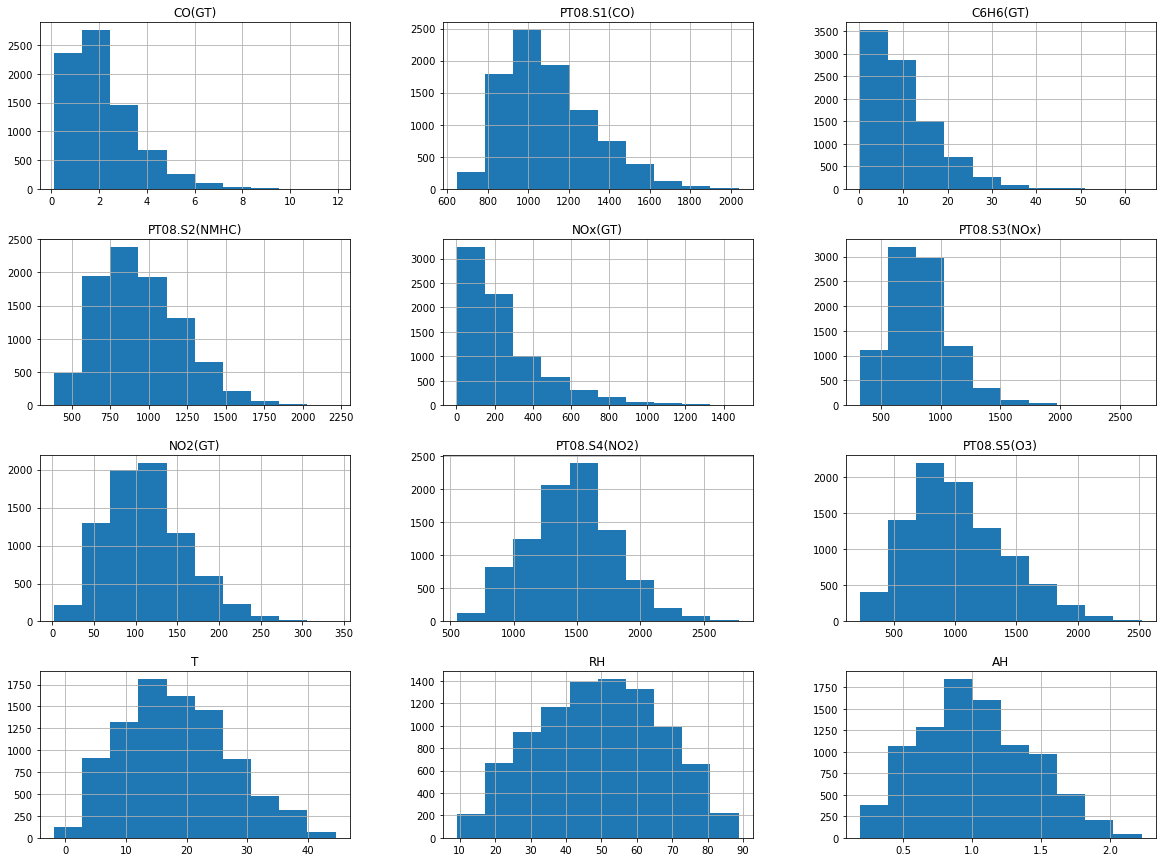

In [11]:
freqgraph = df2.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [12]:
df2.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [13]:
# replace the missing values of skewed data with median 
df2['CO(GT)'].fillna(df2['CO(GT)'].median(),inplace=True)
df2['PT08.S1(CO)'].fillna(df2['PT08.S1(CO)'].median(),inplace=True)
df2['C6H6(GT)'].fillna(df2['C6H6(GT)'].median(),inplace=True)
df2['PT08.S2(NMHC)'].fillna(df2['PT08.S2(NMHC)'].median(),inplace=True)
df2['NOx(GT)'].fillna(df2['NOx(GT)'].median(),inplace=True)
df2['PT08.S3(NOx)'].fillna(df2['PT08.S3(NOx)'].median(),inplace=True)
df2['NO2(GT)'].fillna(df2['NO2(GT)'].median(),inplace=True)
df2['PT08.S5(O3)'].fillna(df2['PT08.S5(O3)'].median(),inplace=True)

In [14]:
# replace the missing values with mean
df2['PT08.S4(NO2)'].fillna(df2['PT08.S4(NO2)'].median(),inplace=True)
df2['T'].fillna(df2['T'].median(),inplace=True)
df2['RH'].fillna(df2['RH'].median(),inplace=True)
df2['AH'].fillna(df2['AH'].median(),inplace=True)

In [15]:
df2.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### 2) Outlier detection and handling 

<AxesSubplot:xlabel='CO(GT)'>

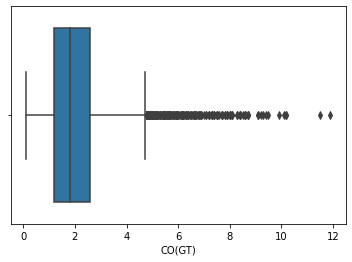

In [16]:
# Check for outliers
sns.boxplot(df2['CO(GT)'])

In [17]:
# Identify the outliers
Q1=np.percentile(df2['CO(GT)'],25,interpolation="midpoint")
Q3=np.percentile(df2['CO(GT)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['CO(GT)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

454

<AxesSubplot:xlabel='CO(GT)'>

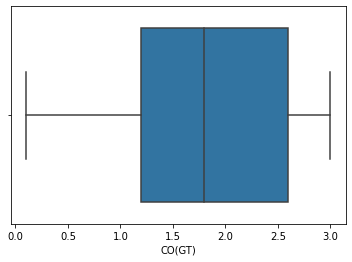

In [18]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['CO(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df2['CO(GT)'] = np.where(df2['CO(GT)']>ninetieth_percentile, ninetieth_percentile, df2['CO(GT)'])

sns.boxplot(df2['CO(GT)'])

The outliers of feature 'CO(GT)' is removed.

<AxesSubplot:xlabel='PT08.S1(CO)'>

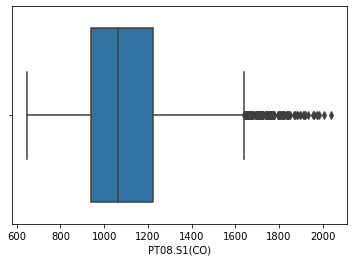

In [19]:
# Check for outliers
sns.boxplot(df2['PT08.S1(CO)'])

In [20]:
# Identify the outliers
Q1=np.percentile(df2['PT08.S1(CO)'],25,interpolation="midpoint")
Q3=np.percentile(df2['PT08.S1(CO)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['PT08.S1(CO)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

145

<AxesSubplot:xlabel='PT08.S1(CO)'>

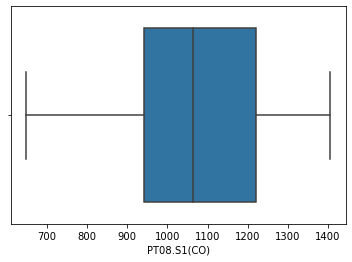

In [21]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['PT08.S1(CO)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df2['PT08.S1(CO)'] = np.where(df2['PT08.S1(CO)']>ninetieth_percentile, ninetieth_percentile,df2['PT08.S1(CO)'])

sns.boxplot(df2['PT08.S1(CO)'])

The outliers of feature 'PT08.S1(CO)' is removed.

<AxesSubplot:xlabel='C6H6(GT)'>

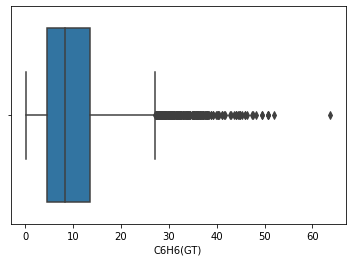

In [22]:
# check for outliers
sns.boxplot(df2['C6H6(GT)'])

In [23]:
# identify outliers
Q1=np.percentile(df2['C6H6(GT)'],25,interpolation="midpoint")
Q3=np.percentile(df2['C6H6(GT)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['C6H6(GT)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

281

<AxesSubplot:xlabel='C6H6(GT)'>

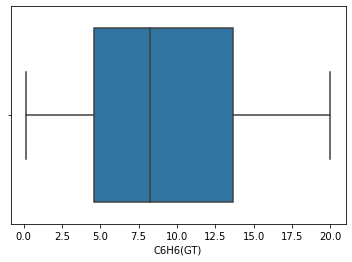

In [24]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['C6H6(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df2['C6H6(GT)'] = np.where(df2['C6H6(GT)']>ninetieth_percentile, ninetieth_percentile,df2['C6H6(GT)'])

sns.boxplot(df2['C6H6(GT)'])

The outliers of feature 'C6H6(GT)' is removed.

<AxesSubplot:xlabel='PT08.S2(NMHC)'>

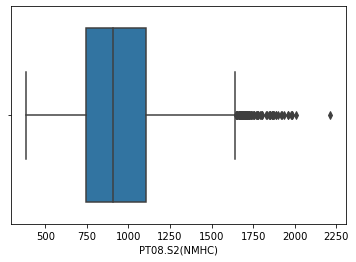

In [25]:
# check for outliers
sns.boxplot(df2['PT08.S2(NMHC)'])

In [26]:
# identify the outliers
Q1=np.percentile(df2['PT08.S2(NMHC)'],25,interpolation="midpoint")
Q3=np.percentile(df2['PT08.S2(NMHC)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['PT08.S2(NMHC)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

92

<AxesSubplot:xlabel='PT08.S2(NMHC)'>

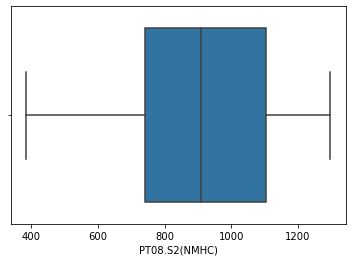

In [27]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['PT08.S2(NMHC)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df2['PT08.S2(NMHC)'] = np.where(df2['PT08.S2(NMHC)']>ninetieth_percentile, ninetieth_percentile,df2['PT08.S2(NMHC)'])

sns.boxplot(df2['PT08.S2(NMHC)'])

The outliers of feature 'PT08.S2(NMHC)' is removed.

<AxesSubplot:xlabel='NOx(GT)'>

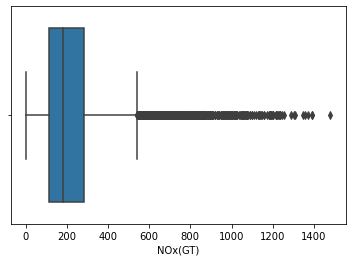

In [28]:
# check for the outliers
sns.boxplot(df2['NOx(GT)'])

In [29]:
# identify the outliers
Q1=np.percentile(df2['NOx(GT)'],25,interpolation="midpoint")
Q3=np.percentile(df2['NOx(GT)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['NOx(GT)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

778

<AxesSubplot:xlabel='NOx(GT)'>

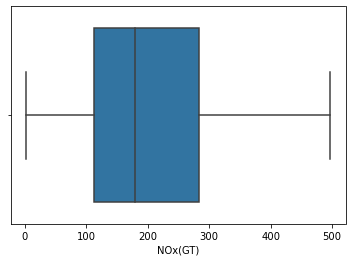

In [30]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['NOx(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df2['NOx(GT)'] = np.where(df2['NOx(GT)']>ninetieth_percentile, ninetieth_percentile,df2['NOx(GT)'])

sns.boxplot(df2['NOx(GT)'])

The outliers of feature 'NOx(GT)' is removed.

<AxesSubplot:xlabel='PT08.S3(NOx)'>

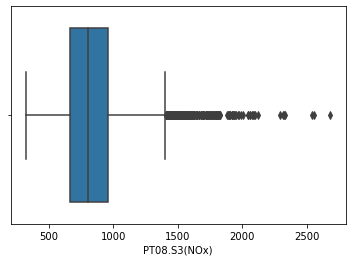

In [31]:
# check for the outliers
sns.boxplot(df2['PT08.S3(NOx)'])

In [32]:
# identify the outliers
Q1=np.percentile(df2['PT08.S3(NOx)'],25,interpolation="midpoint")
Q3=np.percentile(df2['PT08.S3(NOx)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['PT08.S3(NOx)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

277

<AxesSubplot:xlabel='PT08.S3(NOx)'>

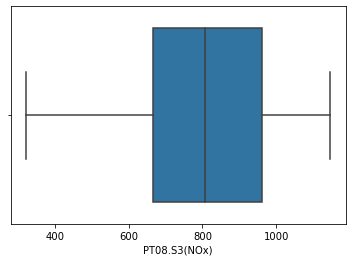

In [33]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['PT08.S3(NOx)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df2['PT08.S3(NOx)'] = np.where(df2['PT08.S3(NOx)']>ninetieth_percentile, ninetieth_percentile,df2['PT08.S3(NOx)'])

sns.boxplot(df2['PT08.S3(NOx)'])

The outliers of feature 'PT08.S3(NOx)' is removed.

<AxesSubplot:xlabel='NO2(GT)'>

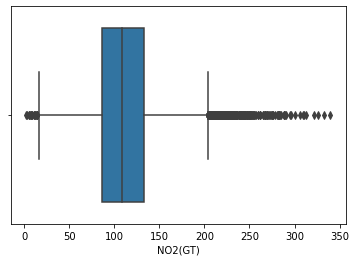

In [34]:
# check for the outliers
sns.boxplot(df2['NO2(GT)'])

In [35]:
#identify the outliers
Q1=np.percentile(df2['NO2(GT)'],25,interpolation="midpoint")
Q3=np.percentile(df2['NO2(GT)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['NO2(GT)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

379

<AxesSubplot:xlabel='NO2(GT)'>

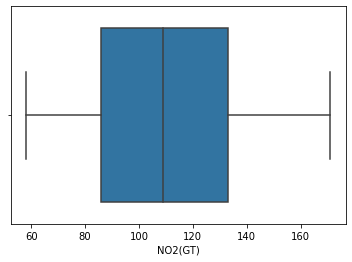

In [36]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['NO2(GT)'], 90))
tenth_percentile = int(np.percentile(df2['NO2(GT)'], 10))

# the values above 90th percentile are replaced with 90th percentile value
df2['NO2(GT)']= np.where(df2['NO2(GT)']>ninetieth_percentile, ninetieth_percentile,df2['NO2(GT)'])
df2['NO2(GT)']= np.where(df2['NO2(GT)']<tenth_percentile, tenth_percentile,df2['NO2(GT)'])

sns.boxplot(df2['NO2(GT)'])

The outliers of feature 'NO2(GT)' is removed.

<AxesSubplot:xlabel='PT08.S4(NO2)'>

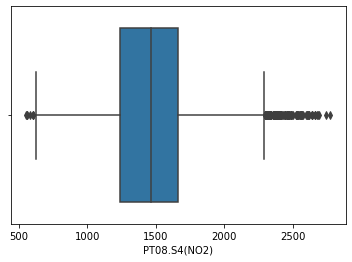

In [37]:
# check for the outliers
sns.boxplot(df2['PT08.S4(NO2)'])

In [38]:
# identify the outliers
Q1=np.percentile(df2['PT08.S4(NO2)'],25,interpolation="midpoint")
Q3=np.percentile(df2['PT08.S4(NO2)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['PT08.S4(NO2)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

131

<AxesSubplot:xlabel='PT08.S4(NO2)'>

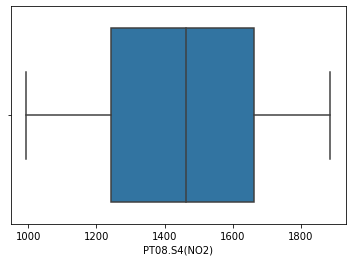

In [39]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['PT08.S4(NO2)'], 90))
tenth_percentile = int(np.percentile(df2['PT08.S4(NO2)'], 10))

# the values above 90th percentile are replaced with 90th percentile value
df2['PT08.S4(NO2)']= np.where(df2['PT08.S4(NO2)']>ninetieth_percentile, ninetieth_percentile,df2['PT08.S4(NO2)'])
df2['PT08.S4(NO2)']= np.where(df2['PT08.S4(NO2)']<tenth_percentile, tenth_percentile,df2['PT08.S4(NO2)'])

sns.boxplot(df2['PT08.S4(NO2)'])

The outliers of feature 'PT08.S4(NO2)' is removed.

<AxesSubplot:xlabel='PT08.S5(O3)'>

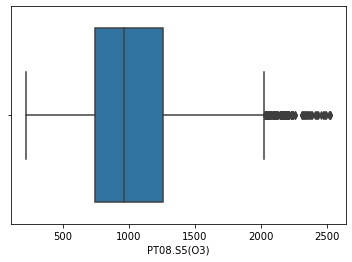

In [40]:
# check for the outliers
sns.boxplot(df2['PT08.S5(O3)']) 

In [41]:
# identify the outliers
Q1=np.percentile(df2['PT08.S5(O3)'],25,interpolation="midpoint")
Q3=np.percentile(df2['PT08.S5(O3)'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['PT08.S5(O3)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

130

<AxesSubplot:xlabel='PT08.S5(O3)'>

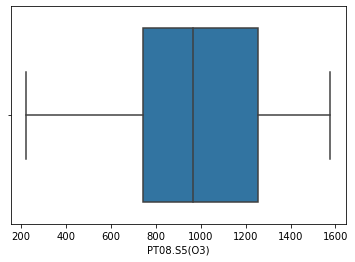

In [42]:
# Computing 90th percentiles and replacing the outliers
ninetieth_percentile = int(np.percentile(df2['PT08.S5(O3)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df2['PT08.S5(O3)']= np.where(df2['PT08.S5(O3)']>ninetieth_percentile, ninetieth_percentile,df2['PT08.S5(O3)'])

sns.boxplot(df2['PT08.S5(O3)'])

The outliers of feature 'PT08.S5(O3)' is removed.

<AxesSubplot:xlabel='T'>

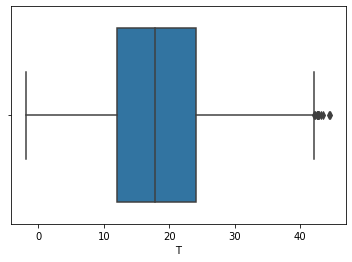

In [43]:
# check for the outliers
sns.boxplot(df2['T']) 

In [44]:
# identify the outliers
Q1=np.percentile(df2['T'],25,interpolation="midpoint")
Q3=np.percentile(df2['T'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['T']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

12

In [45]:
# remove the outliers 
df2 = df2[(df2['T'] > low_lim) & (df2['T'] < up_lim)]

<AxesSubplot:xlabel='T'>

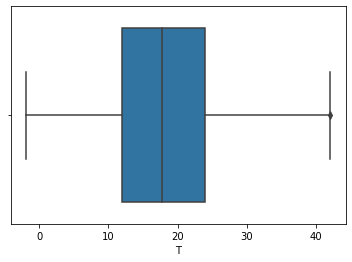

In [46]:
sns.boxplot(df2['T']) 

The outliers of feature 'T' is removed.

<AxesSubplot:xlabel='RH'>

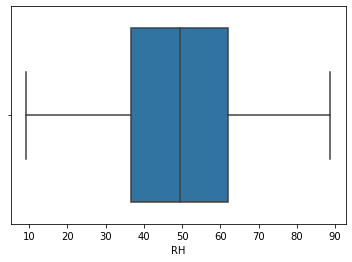

In [47]:
# check for outliers
sns.boxplot(df2['RH']) 

No outliers found for feature 'RH'.

<AxesSubplot:xlabel='AH'>

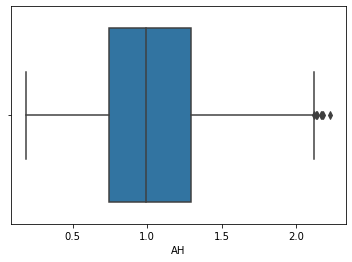

In [48]:
# check for outliers
sns.boxplot(df2['AH']) 

In [49]:
# identify the outliers
Q1=np.percentile(df2['AH'],25,interpolation="midpoint")
Q3=np.percentile(df2['AH'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier = []
for x in df2['AH']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier)

7

In [50]:
# remove the outliers
df2 = df2[(df2['AH'] > low_lim) & (df2['AH'] < up_lim)]

<AxesSubplot:xlabel='AH'>

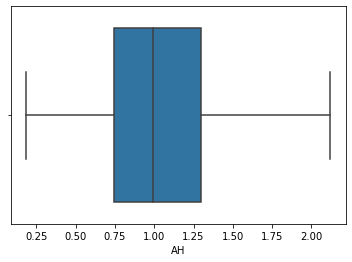

In [51]:
sns.boxplot(df2['AH']) 

The outliers of feature 'AH' is removed.

### 3) Standardization

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2_scaler=scaler.fit_transform(df2)
df2.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1146.00,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1146.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## Exploratory Data Analysis

In [54]:
df2.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000
mean,1.846166,1085.305285,9.398463,922.448285,214.574084,813.356536,110.636303,1448.641742,997.658385,18.255885,49.280734,1.023374
std,0.811440,185.181467,5.815711,230.418994,138.568920,202.139463,34.423505,279.476987,343.475778,8.619249,16.937178,0.394997
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,58.000000,993.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,4.581919,742.000000,112.000000,665.062500,85.925000,1240.750000,741.250000,12.025000,36.599999,0.745831
50%,1.800000,1063.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.600000,1221.437500,13.636091,1104.750000,284.800000,960.750000,133.000000,1661.687500,1255.625000,24.000000,61.875001,1.295626
max,3.000000,1406.000000,20.000000,1298.000000,497.000000,1146.000000,171.000000,1886.000000,1577.000000,42.049999,88.725000,2.119450


### 1) Univariate Analysis

As already we have performed the boxplot analysis for all features, here we go for density plot of few features.

<AxesSubplot:xlabel='T', ylabel='Density'>

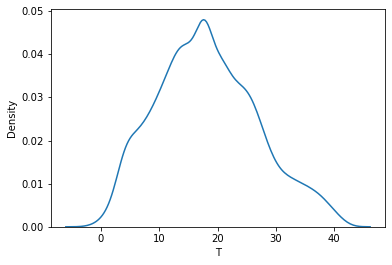

In [55]:
# Density plot
sns.kdeplot(df2['T'])

<AxesSubplot:xlabel='RH', ylabel='Density'>

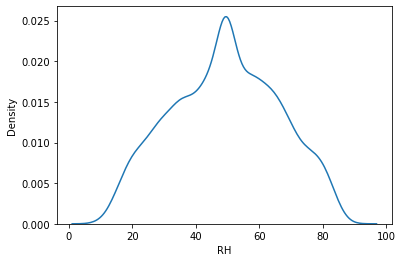

In [56]:
# Density plot
sns.kdeplot(df2['RH'])

<AxesSubplot:xlabel='AH', ylabel='Density'>

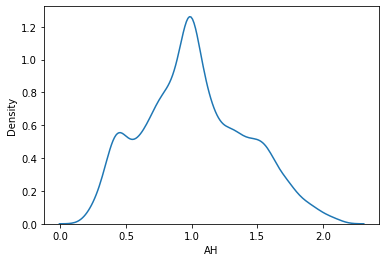

In [57]:
# Density plot
sns.kdeplot(df2['AH'])

### 2) Bivariate Analysis

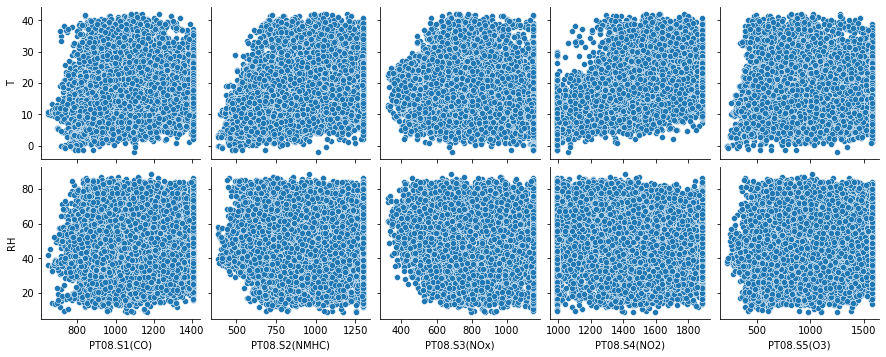

In [60]:
sns.pairplot(
    df2,
    x_vars=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'],
    y_vars=["T", "RH"],
)

## Modelling